--- Data Head ---
   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  

--- Data Shape ---
(303, 14)

--- Data Types ---
age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

--- Null Values ---
age       

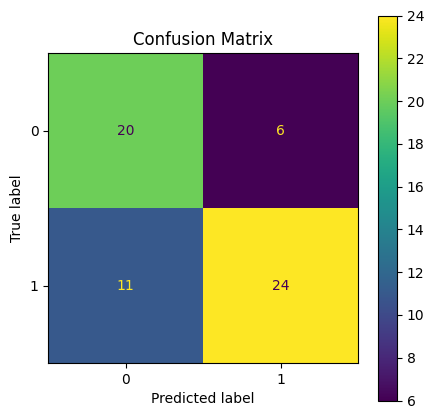


--- Performance Metrics ---
Accuracy: 72.1311475409836
Precision: 80.0
Recall: 68.57142857142857
F1 Score: 73.84615384615385
ROC AUC score: 0.727


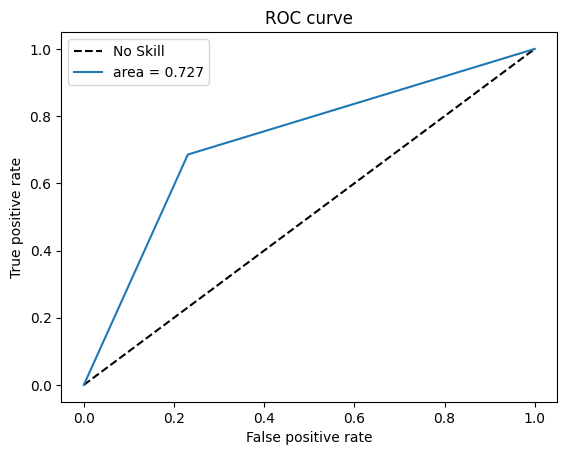

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

df = pd.read_excel('/content/heart.xlsx')

print("--- Data Head ---")
print(df.head())
print("\n--- Data Shape ---")
print(df.shape)
print("\n--- Data Types ---")
print(df.dtypes)
print("\n--- Null Values ---")
print(df.isnull().sum())

X = df.drop(columns=['output'])
y = df['output']

print("\n--- X Shape ---")
print(X.shape)
print("\n--- y Shape ---")
print(y.shape)

unique_values = np.unique(y)
for i, value in enumerate(unique_values):
    count = np.count_nonzero(y == value)
    print(f"Class label: {value}, Count: {count}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

print("\n--- Training Shape ---")
print(X_train.shape)
print("--- Testing Shape ---")
print(X_test.shape)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

dt_model = DecisionTreeClassifier(random_state=40)
dt_model.fit(X_train, y_train)
preds = dt_model.predict(X_test)

classes = ["0", "1"]
cm = confusion_matrix(y_test, preds)
print('\n--- Confusion Matrix ---')
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp.plot(ax=ax)
plt.show()

print('\n--- Performance Metrics ---')
Accuracy = metrics.accuracy_score(y_test, preds)
print('Accuracy:', Accuracy*100)

Precision = metrics.precision_score(y_test, preds)
print('Precision:', Precision*100)

Recall = metrics.recall_score(y_test, preds)
print('Recall:', Recall*100)

F1_score = metrics.f1_score(y_test, preds)
print('F1 Score:', F1_score*100)

roc_auc = roc_auc_score(y_test, preds)
print('ROC AUC score: %.3f' % roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc_val = auc(fpr, tpr)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.plot(fpr, tpr, label='area = {:.3f}'.format(roc_auc_val))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()